#### Introduction
In this notebook we wil analyze the california-housing-prices.

The dataset contains these files:
* Datasets
* Datasets Descripton

#### Table of Contents
> Importing Libraries

> Reading the Data

> Exploratory Data Analysis
  - Data Cleaning
  - Handling numerical features
  - Handling categorical features
  - Handing multicollnearity
 
> Data Preparation
  - Spliting
  - 

> Model Building
  - Training the model
  - Testing the model
  - Model Evaluation

> Fine Tunning the model
  - Assessing the Impact Otliiers
  - Handing multicollnearity

#### Dataset Description

1. ##### longitude: A measure of how far west a house is; a higher value is farther west
2. ##### latitude: A measure of how far north a house is; a higher value is farther north
3. ##### housingMedianAge: Median age of a house within a block; a lower number is a newer building
4. ##### totalRooms: Total number of rooms within a block
5. ##### totalBedrooms: Total number of bedrooms within a block
6. ##### population: Total number of people residing within a block
7. ##### households: Total number of households, a group of people residing within a home unit, for a block
8. ##### medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)
9. ##### medianHouseValue: Median house value for households within a block (measured in US Dollars)
10. ##### oceanProximity: Location of the house w.r.t ocean/sea

#### Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

#### Reading the Data

In [6]:
df = pd.read_csv("california-housing-prices.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


#### Exploratory Data Analysis

In [10]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
# obvious issues with the data
# 1. total_rooms can not be  

In [ ]:
# how much impact does having a house in proximity to ocean have on the pedian_house value

# who the impact be diifferent based on the age and total_bedrooms 

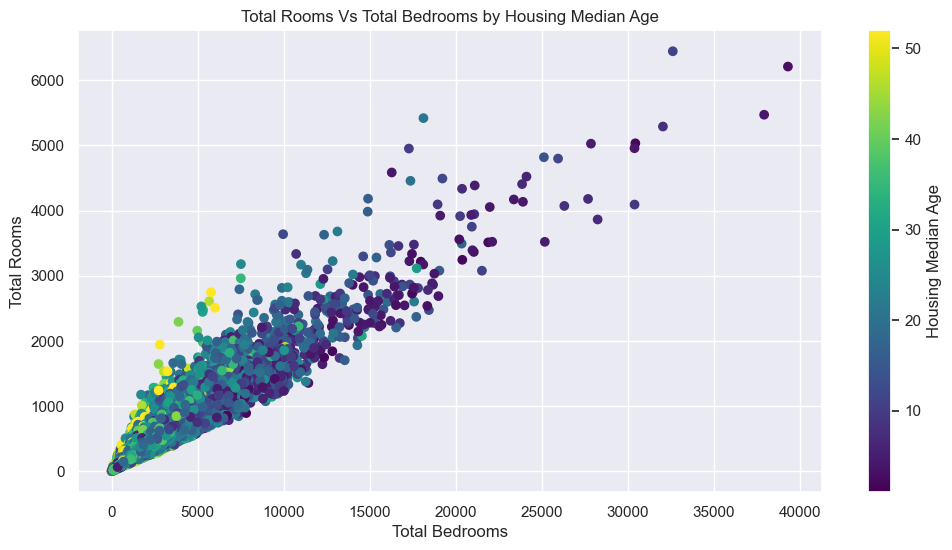

In [155]:
plt.figure(figsize=(12, 6))
scatter = plt.scatter(df['total_rooms'], df['total_bedrooms'], c=df['housing_median_age'], cmap='viridis')
plt.title('Total Rooms Vs Total Bedrooms by Housing Median Age')
plt.ylabel('Total Rooms')
plt.xlabel('Total Bedrooms')

# Add coor bar for house median age
cbar = plt.colorbar(scatter)
cbar.set_label('Housing Median Age')

plt.show()

In [139]:
# Group by the specified columns and count the rows
grouped_df = df.groupby(['total_rooms', 'median_income', 'households']).size().reset_index(name='total_count')
# Select the desired columns
selected_columns = ['total_rooms', 'median_income', 'households', 'total_count']
grouped_df = grouped_df[selected_columns]
grouped_df
#20433

,total_rooms,median_income,households,total_count
0,2.0,2.3750,2.0,1
1,6.0,1.6250,2.0,1
2,8.0,15.0001,1.0,1
3,11.0,2.8750,13.0,1
4,12.0,0.4999,7.0,1
...,...,...,...,...
20635,30450.0,4.5936,3197.0,1
20636,32054.0,6.0191,5050.0,1
20637,32627.0,2.3087,6082.0,1
20638,37937.0,7.4947,5189.0,1


In [ ]:
#

In [137]:
grouped_df[grouped_df['total_bedrooms'].isnull()]

,total_rooms,median_income,households,total_bedrooms,total_count


In [127]:
# Group by `year_of_employment`, `years_of_experience`, and `level_of_education`
grouped_df = df.groupby(['total_rooms', 'median_income', 'households'])
# Calculate the mean salary for each group
mean_salaries = grouped_df['total_bedrooms'].mean()
mean_salaries

total_rooms  median_income  households
2.0          2.3750         2.0              2.0
6.0          1.6250         2.0              2.0
8.0          15.0001        1.0              1.0
11.0         2.8750         13.0            11.0
12.0         0.4999         7.0              4.0
                                           ...  
30450.0      4.5936         3197.0        5033.0
32054.0      6.0191         5050.0        5290.0
32627.0      2.3087         6082.0        6445.0
37937.0      7.4947         5189.0        5471.0
39320.0      4.9516         5358.0        6210.0
Name: total_bedrooms, Length: 20640, dtype: float64

In [7]:
df.apply(lambda x: sum(x.isnull()))

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [9]:
# filtered out missing rows
filtered_df = df.dropna(subset=df.columns)
filtered_df.apply(lambda x: sum(x.isnull()))

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

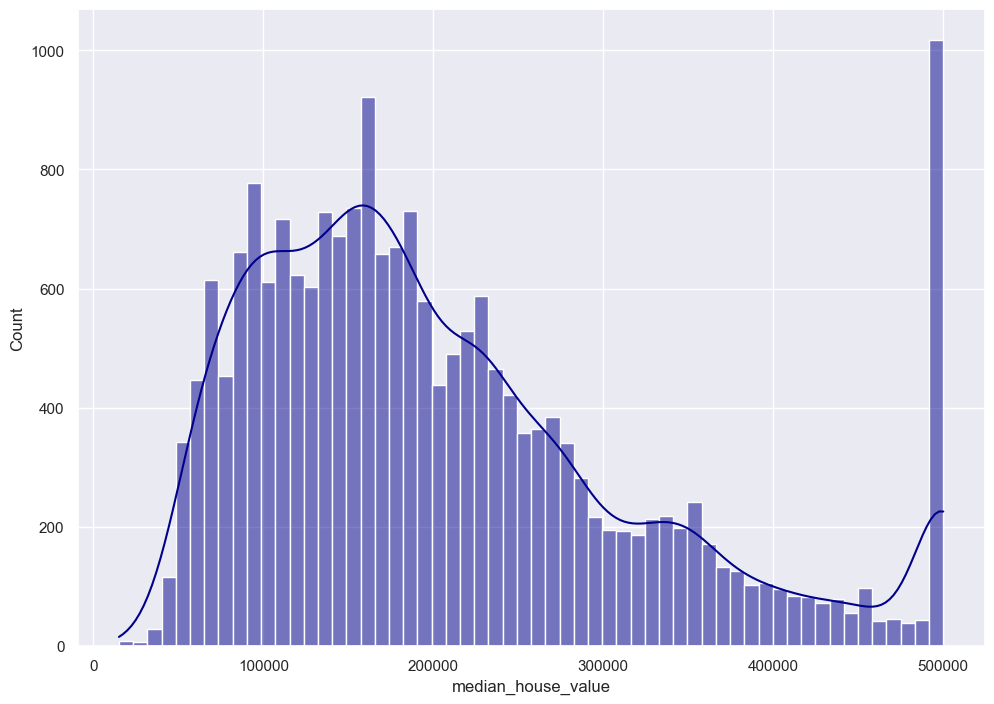

In [15]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.histplot(data=filtered_df, x='median_house_value', kde=True, bins=int(700/12), color = 'darkblue')
plt.show()

#### Outliers Detection

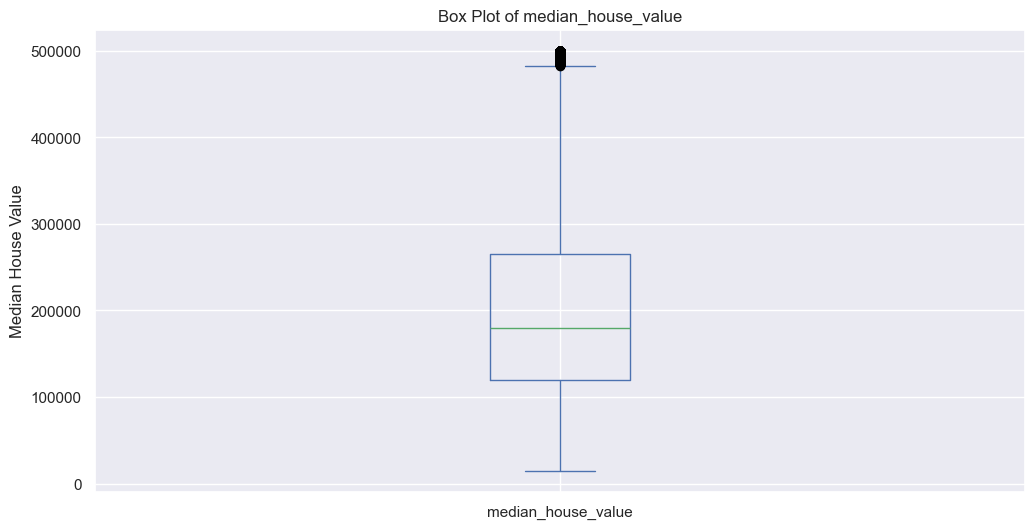

In [21]:
plt.figure(figsize=(12, 6))
filtered_df['median_house_value'].plot(kind='box')
plt.title('Box Plot of median_house_value')
plt.ylabel('Median House Value')
plt.show()

In [25]:
def winsorize_column(df, column_name, lower_percentile=0.05, upper_percentile=0.95):
  """Winsorizes a specified column in a DataFrame.

  Args:
    df: The input DataFrame.
    column_name: The name of the column to Winsorize.
    lower_percentile: The lower percentile for Winsorization.
    upper_percentile: The upper percentile for Winsorization.

  Returns:
    A new DataFrame with the Winsorized column.
  """

  # Calculate the lower and upper bounds
  lower_bound = df[column_name].quantile(lower_percentile)
  upper_bound = df[column_name].quantile(upper_percentile)

  # Winsorize the column
  winsorized_data = df[column_name].clip(lower=lower_bound, upper=upper_bound)

  # Create a new DataFrame with the Winsorized column
  new_df = df.copy()
  new_df[column_name] = winsorized_data

  return new_df

In [27]:
# Assuming your DataFrame is named 'df'
new_df = winsorize_column(filtered_df, 'median_house_value', lower_percentile=0.01, upper_percentile=0.99)
new_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [98]:
new_df.ocean_proximity.unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

#### Spotting Multicollinearity

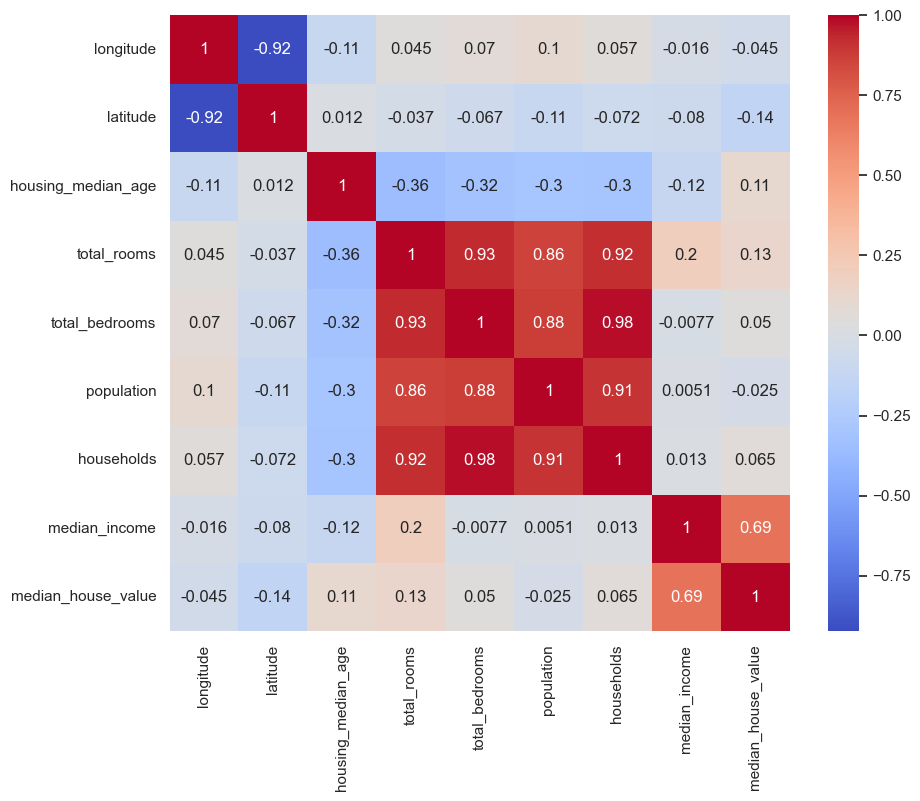

In [29]:
corr_matrix = new_df[['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

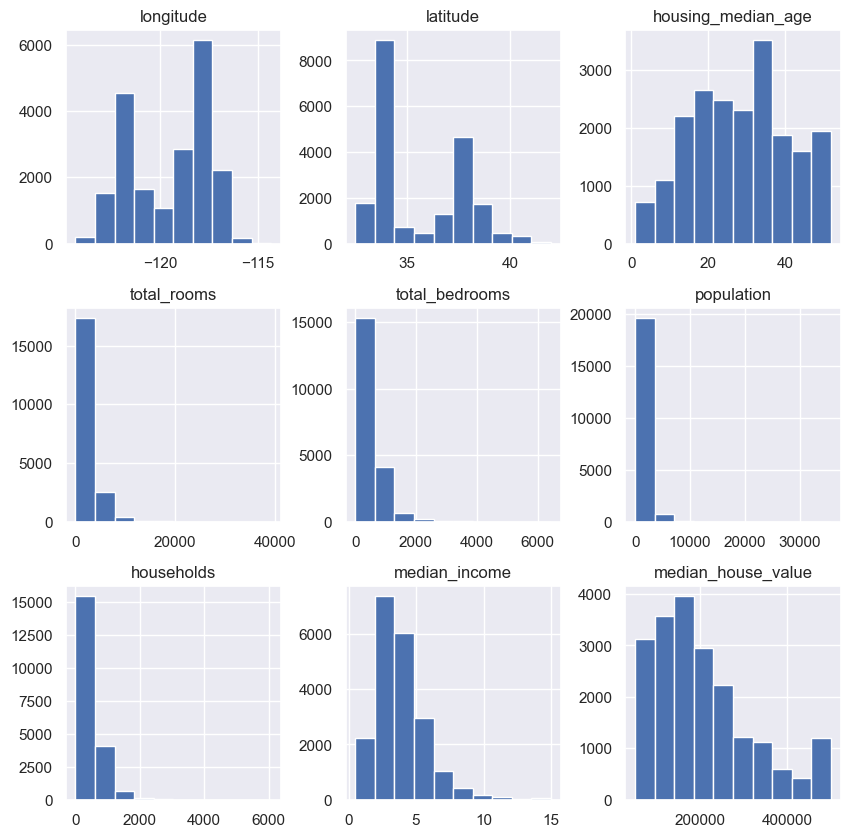

In [106]:
num_attributes = new_df.select_dtypes(include=['int','float'])
num_attributes.hist(figsize=(10,10))

In [ ]:
# Assuming your data is in a DataFrame named 'df'
X = new_df[['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value']]  # Independent variables
y = new_df['median_house_value']  # Dependent variable


# Split data into features and target
X = df.drop(["median_house_value"], axis=1)
y = df["median_house_value"]

X = pd.get_dummies(data=X, drop_first=True)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [89]:




# Calculate VIF
def calculate_vif(X):
    """Calculates the Variance Inflation Factor (VIF) for each feature in a DataFrame.   


    Args:
        X: The DataFrame containing independent variables.

    Returns:
        A dictionary mapping feature names to their VIF scores.
    """

    vif_scores = {}
    for i in range(X.shape[1]):
        vif = variance_inflation_factor(X.values, i)
        vif_scores[X.columns[i]] = round(vif, 2)
    return vif_scores
    
# Calculate VIF scores
vif_results = calculate_vif(X)

# Print VIF scores and feature names
for feature, vif in vif_results.items():
    print(f"Feature: {feature}, VIF: {vif}")

Feature: longitude, VIF: 628.97
Feature: latitude, VIF: 565.83
Feature: housing_median_age, VIF: 7.84
Feature: total_rooms, VIF: 30.99
Feature: total_bedrooms, VIF: 94.51
Feature: population, VIF: 17.39
Feature: households, VIF: 92.66
Feature: median_income, VIF: 15.14
Feature: median_house_value, VIF: 10.02


With a VIF score of 10 or more for a variable, it means that the variance of its coefficient estimate is 10 times larger than it would be if there were no multicollinearity. This indicates a high degree of multicollinearity.

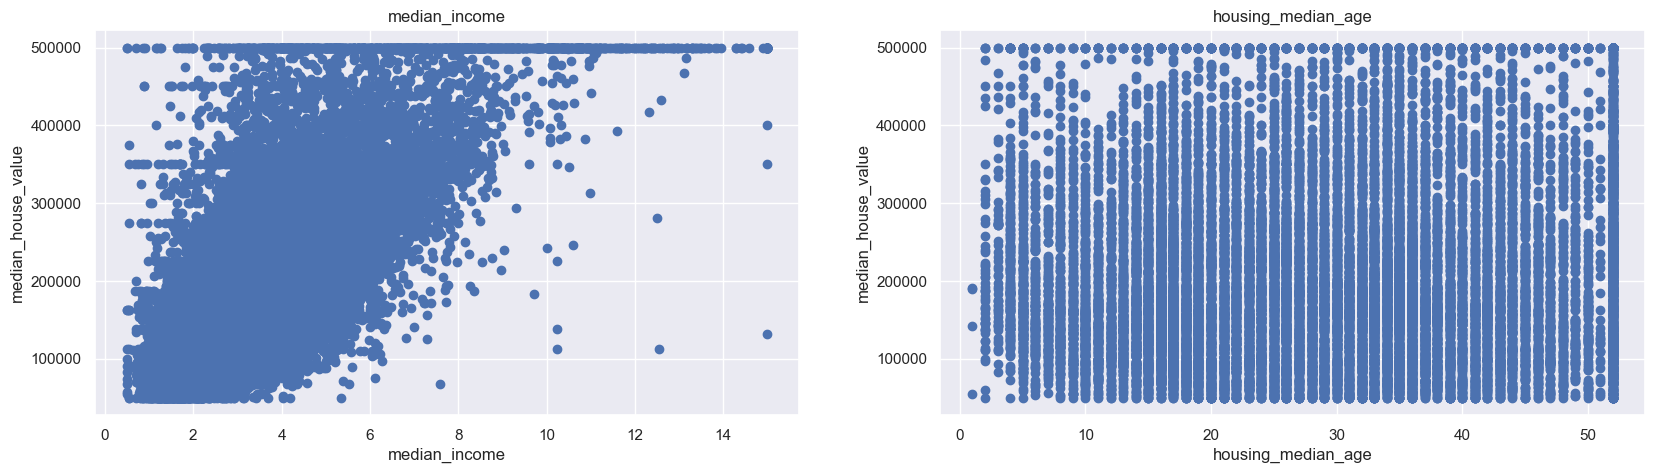

In [37]:
plt.figure(figsize=(20, 5))
features = ['median_income','housing_median_age']
target = new_df.median_house_value

for i, col in enumerate(features):
    plt.subplot(1, len(features), i+1)
    x = new_df[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.xlabel(col)
    plt.ylabel('median_house_value')
    plt.title(col)

In [39]:
X = new_df.drop(columns=['median_house_value'])
Y = new_df.median_house_value

X = pd.get_dummies(data=X, drop_first=True)
X.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,False,False,True,False


In [43]:
#Create Training and Test Sets and Apply Scaling
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20,random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(16346, 12)
(4087, 12)
(16346,)
(4087,)


In [45]:
## with scaliing
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

LinearRegression()

In [49]:
# Print the coefficients
coefficients = lin_model.coef_
intercept = lin_model.intercept_

print("Coefficients:")
for i, coef in enumerate(coefficients):
    print(f"Feature {i+1}: {coef}")

print("Intercept:", intercept)

Coefficients:
Feature 1: -278664.3870843968
Feature 2: -246816.41972234036
Feature 3: 55532.77672707398
Feature 4: -234614.81128071542
Feature 5: 652774.6735013379
Feature 6: -1276721.0621469787
Feature 7: 254776.33490538166
Feature 8: 566591.0528109433
Feature 9: -38170.03463766001
Feature 10: 168158.98914157314
Feature 11: -3930.8710291426955
Feature 12: 3126.240361922477
Intercept: 262241.35754506465


In [ ]:
# Print the coefficients
coefficients = lin_model.coef_
intercept = lin_model.intercept_

print("Coefficients:")
for i, coef in enumerate(coefficients):
    print(f"Feature {i+1}: {coef}")

print("Intercept:", intercept)

In [ ]:

## Model Evaluation
y_train_pred = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_pred)))
r2 = r2_score(y_train, y_train_pred)

print("Model performance for Train Set:")
print("-----------------------------------")
print("R2 is {}".format(round(r2,2)))
print("RMSE is {}".format(round(rmse,2)))

In [ ]:
## Model Evaluation
y_test_pred = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_pred)))
r2 = r2_score(y_test, y_test_pred)

print("Model performance for Test Set:")
print("-----------------------------------")
print("R2 is {}".format(round(r2,2)))
print("RMSE is {}".format(round(rmse,2)))

In [ ]:
plt.scatter(y_test, y_test_pred, marker='o')
plt.show()

In [ ]:
## with scaliing
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Encoding Categorical Varibale

In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline

# Split into features and target
X = df.drop('salary', axis=1)
y = df['salary']

# Create a pipeline for preprocessing and modeling
pipeline = Pipeline([
    ('onehotencoder', OneHotEncoder(handle_unknown='ignore')),
    ('scaler', StandardScaler()),
    ('linear_regression', LinearRegression())
])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,   
 random_state=42)

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipeline.predict(X_test)

### with Regularization (Lasso Regression)

In [ ]:
from sklearn.linear_model import Lasso

# Create a Lasso regression model
model = Lasso(alpha=0.1)  # Adjust alpha as needed

# Fit the model
model.fit(X, y)

# Get the coefficients
coefficients = model.coef_

# Print the coefficients
print("Coefficients:", coefficients)

#### Random Forest 
##### Random Forest is an ensemble method that combines multiple decision trees. Each tree is trained on a random subset of the
##### data and features, reducing the impact of correlations between features.
> This is generally less sensitive to multicollinearity compared to linear regression models. Random Forest randomly selects features at each node during the tree-building process, further mitigating the effects of multicollinearity

>  The ensemble nature of Random Forest makes it more robust to noise and outliers, which can be associated with multicollinearity.

>  Random Forest can provide feature importance scores, which can help identify redundant features that might be contributing to multicollinearity. 

In [46]:
# Split data into features and target
X = df.drop(["median_house_value"], axis=1)
y = df["median_house_value"]

X = pd.get_dummies(data=X, drop_first=True)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 2395652720.041269
R-squared: 0.8171828215602425


In [48]:
# Split data into features and target
X = df.drop(["median_house_value", "total_bedrooms", "total_rooms", "households"], axis=1)
y = df["median_house_value"]

X = pd.get_dummies(data=X, drop_first=True)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 2388183362.0185766
R-squared: 0.8177528236089708


In [44]:
column_name = X.columns

impt_features = rf_model.feature_importances_
imp_df = pd.DataFrame({
    "Features": column_name,
    "Importance": impt_features
})

imp_df = imp_df.sort_values(by='Importance', ascending=False)
# Add cumulative importance column
imp_df['Cumulative Importance'] = imp_df['Importance'].cumsum().round(2)

imp_df

,Features,Importance,Cumulative Importance
7,median_income,0.490717,0.49
8,ocean_proximity_INLAND,0.140933,0.63
0,longitude,0.106093,0.74
1,latitude,0.101897,0.84
2,housing_median_age,0.052065,0.89
5,population,0.032511,0.92
4,total_bedrooms,0.023960,0.95
3,total_rooms,0.023412,0.97
6,households,0.018376,0.99
11,ocean_proximity_NEAR OCEAN,0.008793,1.00


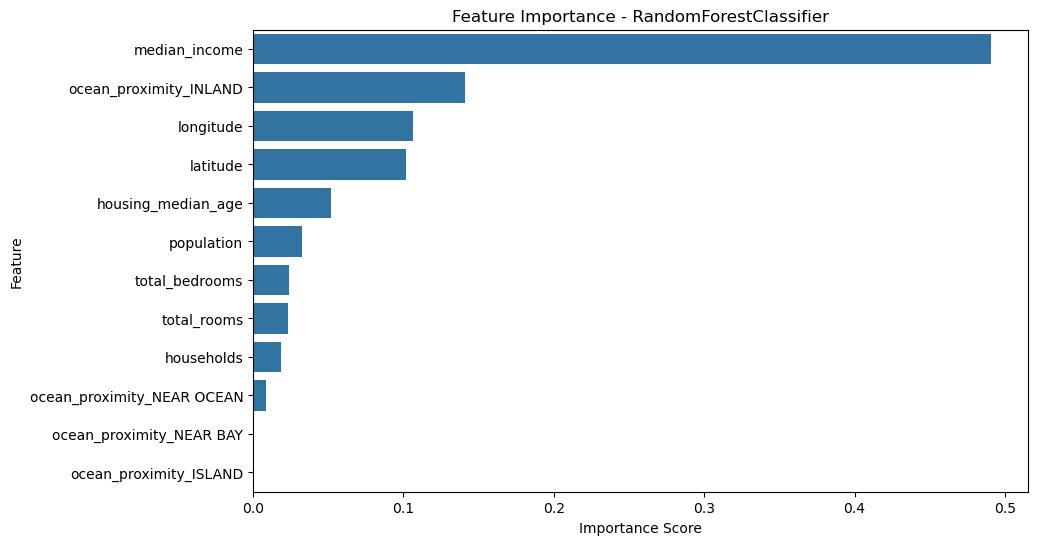

In [38]:
# Plotting the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Features', data=imp_df)
plt.title('Feature Importance - RandomForestReressor')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

In [ ]:
From the above we can achieve the same result using lesser variable 

In [ ]:
# Which area has the house price risen the most in london area
# Has no_of_crimes has any siginficant impact on the prices
# 